# Mobile Price Classification
<img src='22.jpg' alt='logo' width = "90%" hight= "50%" >

<b>the Problem statment</b> : predict actual price for phones 
<p>
<h3>About Data </h3>
<b>Context :</b>
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
</p>

<p>
<ul>
    <h4> Columns : </h4>
    <li>battery_power : Total energy a battery can store in one time measured in mAh</li>
    <li>Blue : Has bluetooth or not </li>
    <li>clock_speed : speed at which microprocessor executes instructions </li>
    <li>dual_sim : Has dual sim support or not </li>
    <li>fc : Front Camera mega pixels </li>
    <li>four_g : have 4g or not  </li>
    <li>int_memory : Internal Memory in Gigabytes</li>
    <li>m_dep : Mobile Depth in cm</li>
    <li>mobile_wt : Weight of mobile phone</li>
    <li>n_cores : Number of cores of processor</li>
    <li>pc : Primary Camera mega pixels </li>
    <li>px_height : Pixel Resolution Height </li>
    <li>px_width : Pixel Resolution Width </li>
    <li>ram : Random Access Memory in Mega Bytes </li>
    <li>sc_h : Screen Height of mobile in cm </li>
    <li>sc_w : Screen Width of mobile in cm </li>
    <li>talk_time : longest time that a single battery charge will last when you are </li>
    <li>three_g : Has 3G or not </li>
    <li>touch_screen : Has touch screen or not </li>
    <li>wifi : Has wifi or not </li>
    <li>price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost) </li>
</ul>
</p>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

<h2>import data </h2>

In [81]:
df = pd.read_csv('test.csv' , index_col = False)
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


<h3>check Data types of columns & missing values</h3>

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [83]:
df.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [84]:
df.duplicated().sum()

0

<h3>Check variance of each col ny using statistics</h3>

In [85]:
df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


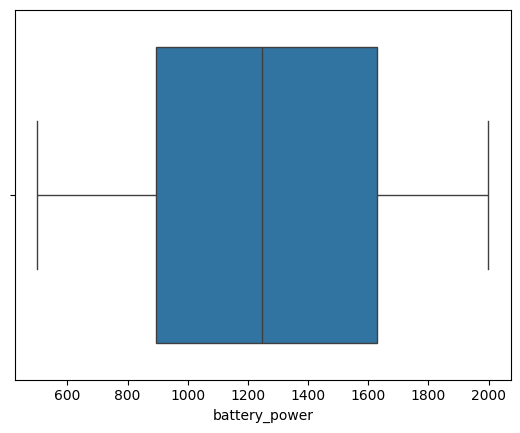

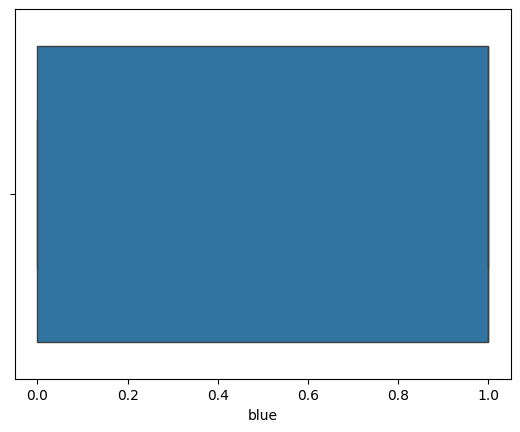

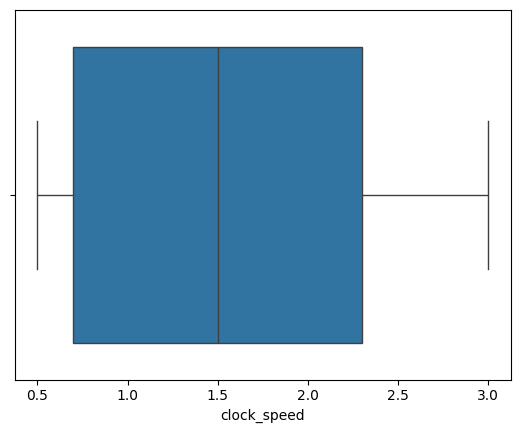

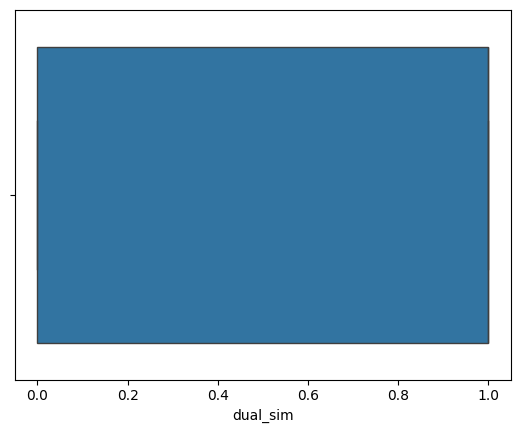

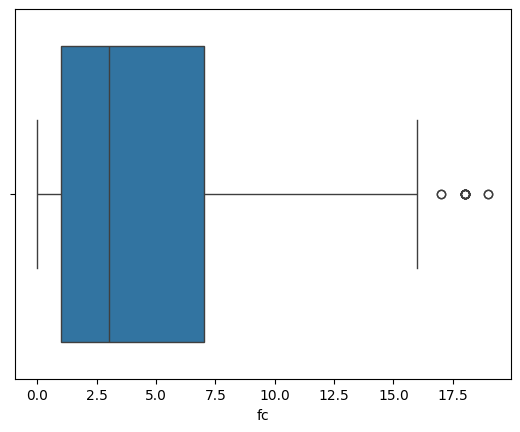

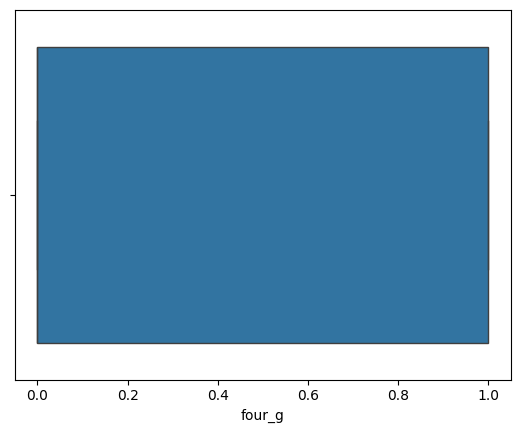

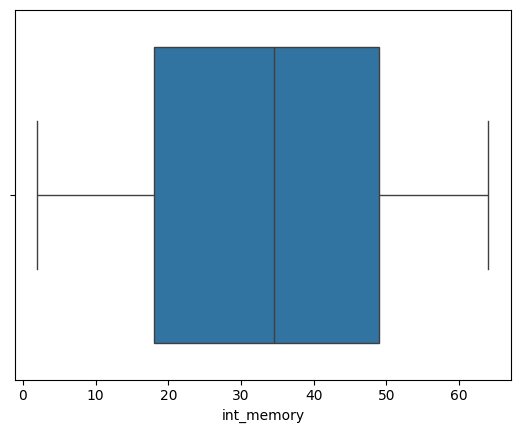

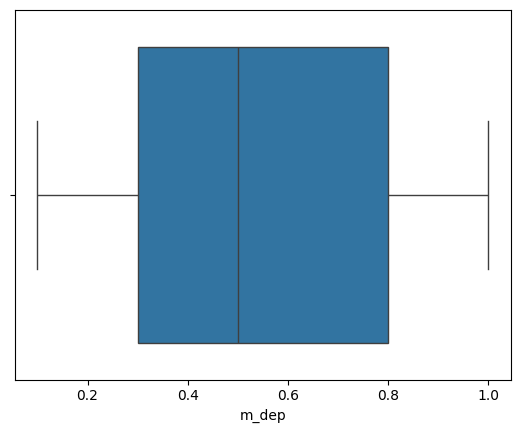

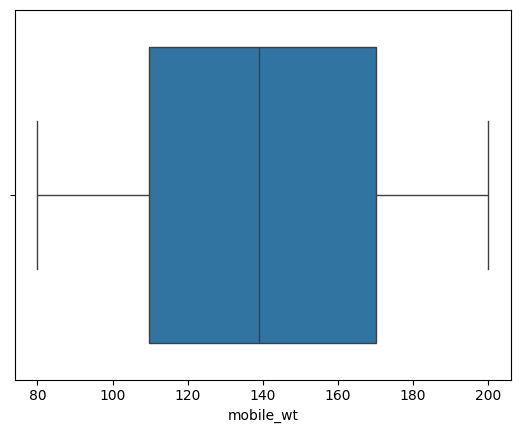

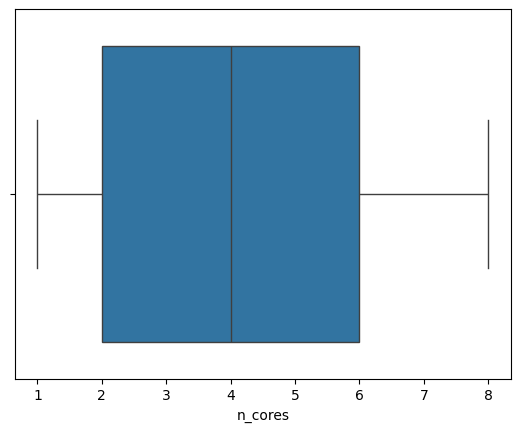

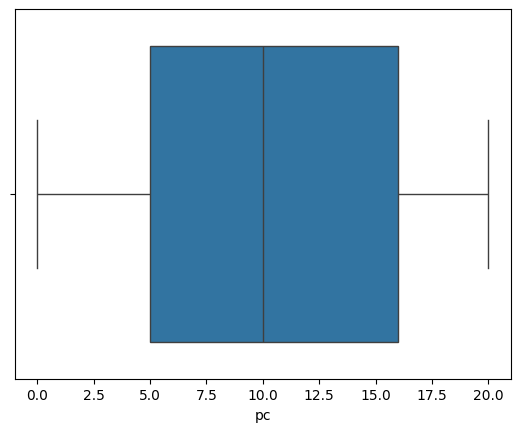

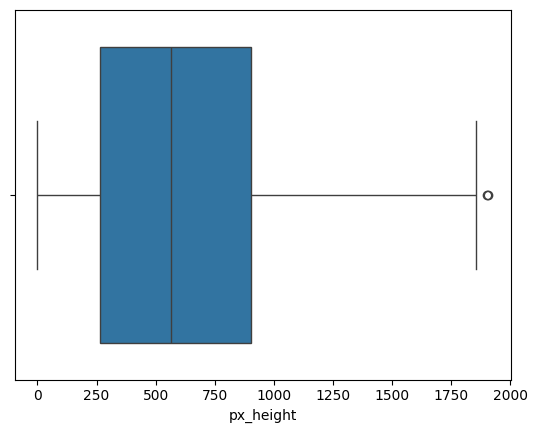

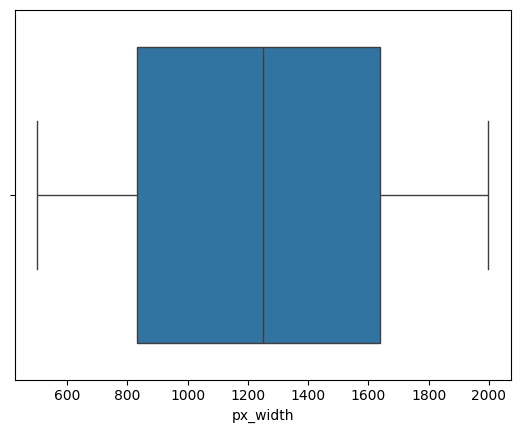

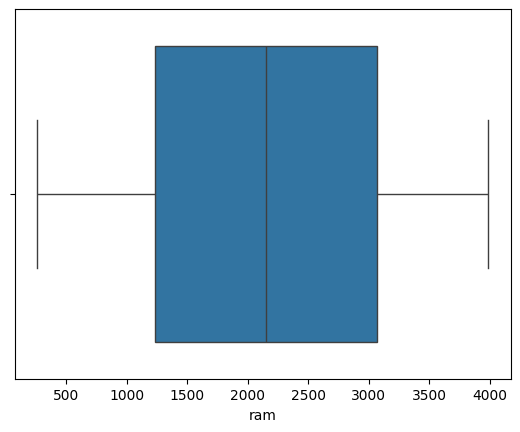

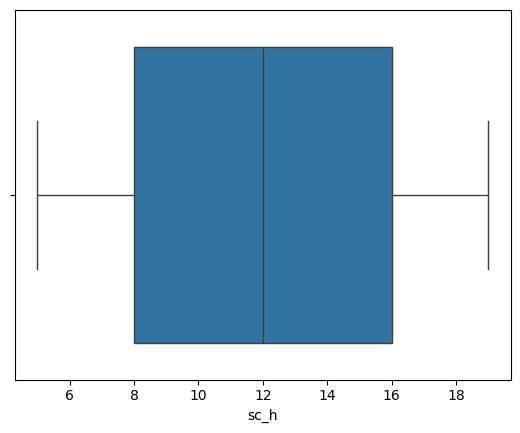

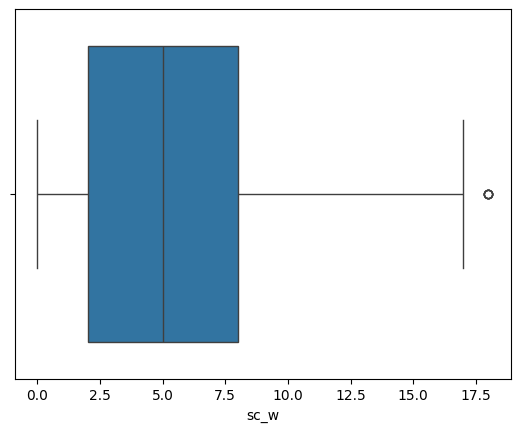

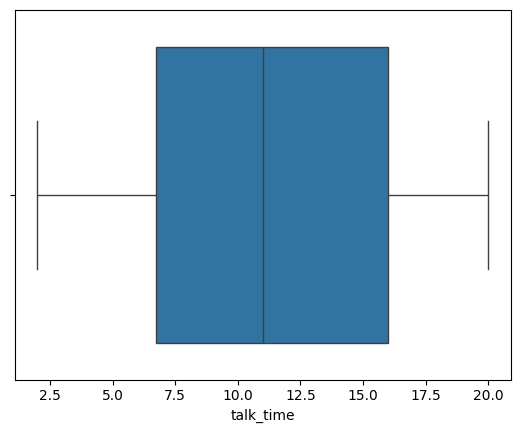

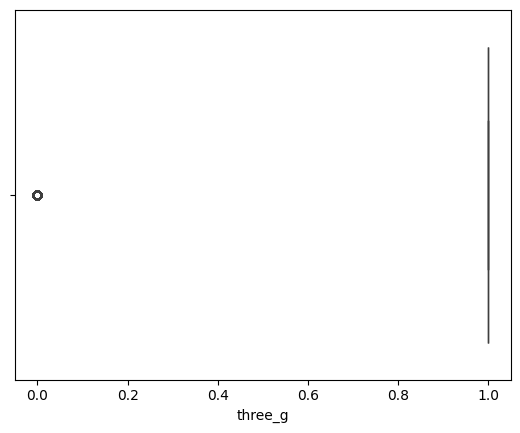

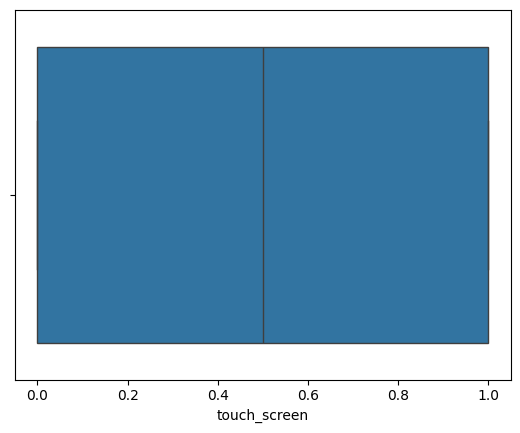

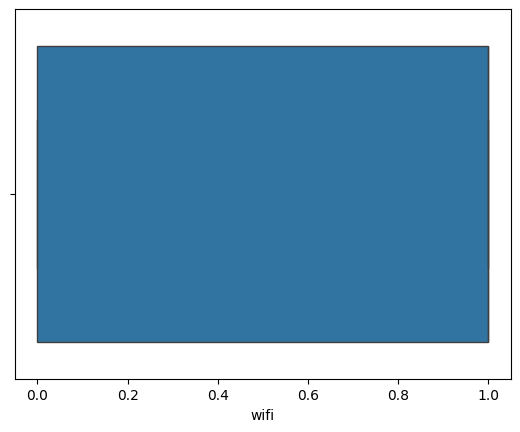

ValueError: Could not interpret value `price_range` for `x`. An entry with this name does not appear in `data`.

In [86]:
for c in df_no_outliers.columns : 
    sns.boxplot(x = c, data=df)
    plt.show()

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

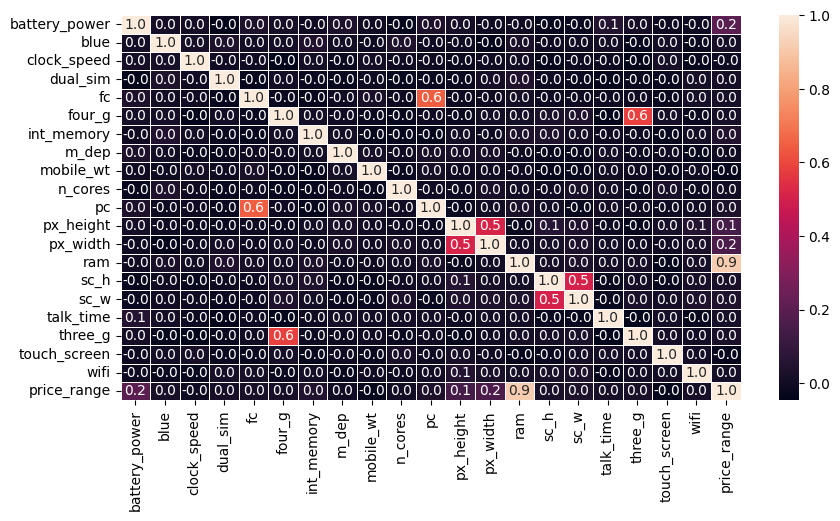

In [ ]:
df_tt = df.copy()
fig, ax = plt.subplots(figsize=(10, 5))  
sns.heatmap(df_tt.corr(), annot=True, ax=ax, fmt='.1f', linewidths=0.5)
plt.show()

In [ ]:
for c in df.columns : 
    print(f"{c} : {np.var(df[c])}")

battery_power : 192991.81565775
blue : 0.24997499999999997
clock_speed : 0.6655299375
dual_sim : 0.24990975
fc : 18.838709749999996
four_g : 0.24953775000000003
int_memory : 329.10233775
m_dep : 0.08314193750000001
mobile_wt : 1252.508999
n_cores : 5.23157975
pc : 36.75752775
px_height : 196842.93733600003
px_width : 186702.96375975
ram : 1176055.2846310001
sc_h : 17.74255775
sc_w : 18.968711000000003
talk_time : 29.839879
three_g : 0.18161775000000002
touch_screen : 0.24999099999999996
wifi : 0.24995100000000003
price_range : 1.25


In [ ]:
X = df.drop('price_range' , axis = 1)
y = df['price_range']

In [ ]:
X_scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214


In [87]:

X_train , X_test , y_train , y_test = train_test_split(X_scaled_df,y ,stratify=y , test_size=0.3 , random_state=42)
print(X_train.shape , X_test.shape)

(1400, 21) (600, 21)


In [88]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train , y_train)
y_predict= log.predict(X_test)
print(log.score(X_test ,y_test ))

1.0
